<a href="https://colab.research.google.com/github/2303a52351-Saniya/Generative-AI-2025/blob/main/exai_l4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wine Quality (Multiclass Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

In [2]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [5]:
perm = permutation_importance(model, X_test_scaled, y_test, n_repeats=30, random_state=42)
sorted_idx = perm.importances_mean.argsort()


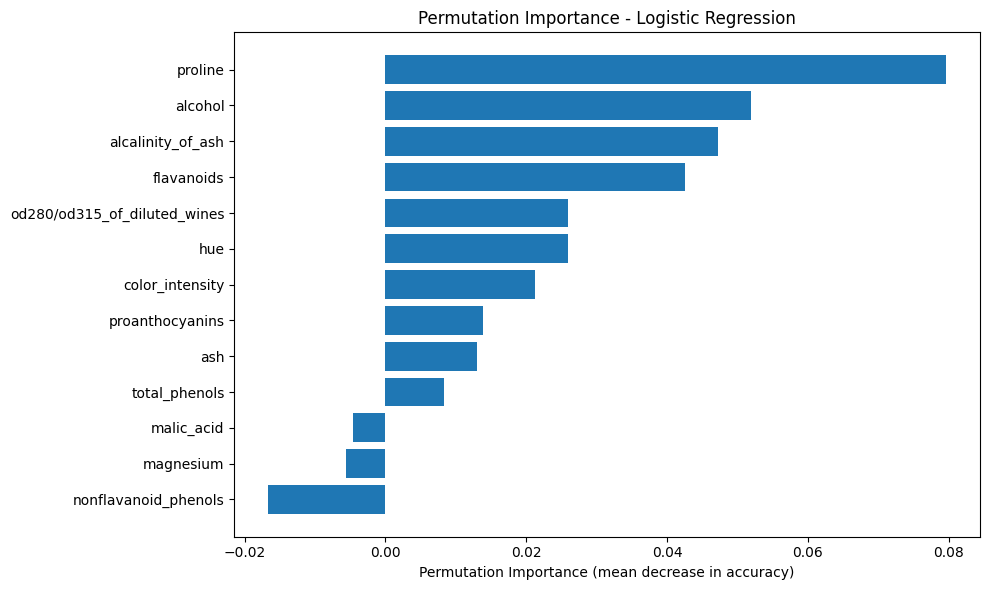

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(np.array(data.feature_names)[sorted_idx], perm.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance (mean decrease in accuracy)")
plt.title("Permutation Importance - Logistic Regression")
plt.tight_layout()
plt.show()
